## Lambdas: Parameterisation and Dimensional Reduction of REE Data
 
**Data** [Compositional Data](2_Data_CompositionalData.ipynb) | [Lambdas](2_Data_Lambdas.ipynb) **Classifiers** [Building Models](3_Classifiers_ClassifierModels.ipynb) | [Feature Selection](3_Classifiers_Dimensionality.ipynb) **Visualisation**  [Entropy](4_Vis_Entropy.ipynb) | [Manifolds](4_Vis_Manifolds.ipynb) **pyrolite** [Overview](6_pyrolite.ipynb) **GitHub** [AEGC2019](https://github.com/morganjwilliams/aegc2019) | [pyrolite](https://github.com/morganjwilliams/pyrolite)

Orthogonal polynomial decomposition can be used for dimensional reduction of smooth function over an independent variable, producing an array of independent values representing the relative weights for each order of component polynomial.



In geochemistry, the most applicable use case is for reduction Rare Earth Element (REE) profiles. The REE are a collection of elements with broadly similar physicochemical properties (the lanthanides), which vary with ionic radii. Given their similar behaviour and typically smooth function of normalised abundance vs. ionic radii, the REE profiles and their shapes can be effectively parameterised and dimensionally reduced (14 elements summarised by 3-4 shape parameters).

This is effectively fitting a sum of weighted independent polynomials to the REE profile, where the weights are then used to represent the curve. This provides a meaningful way to describe REE profile shape. Below is an example of how this can be visualised using the weighted contributions for increasing orders of polynomials.

<img src="https://pyrolite.readthedocs.io/en/develop/_images/OrthogPolyDeconstruction.png" width="65%"/>

Here we use some example data from [Ueki2018] and reduce the REE data to lambda values, and plot the resulting dimensionally reduced data.

[Ueki2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import pyrolite.plot
from pyrolite.geochem.ind import REE

df = pd.read_csv('https://storage.googleapis.com/aegc2019/ueki2018.csv').head(500)

This dataset includes rocks with a range of REE profiles, but not all of the REE. We can calcuate the profile with fewer elmeents, but expect that the resulting values are less precise (especially for any higher order terms).

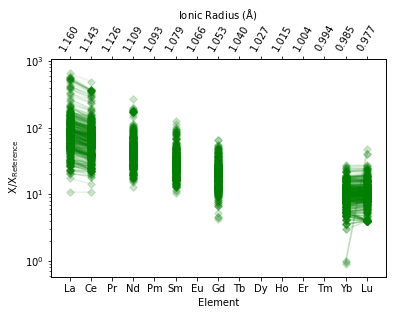

In [38]:
from pyrolite.geochem.norm import ReferenceCompositions
rc = ReferenceCompositions()['Chondrite_PON']
rc.normalize(df).pyroplot.REE(index='elements', color='g', alpha=0.1);

pyrolite includes a convenient function for calculating lambdas:

In [ ]:
lambdas =df.lambda_lnREE(exclude=["Eu", "Pm"], 
                         degree=4,
                         norm_to="Chondrite_PON")

Text(0.5, 1.05, 'lambda Polynomial Coefficients')

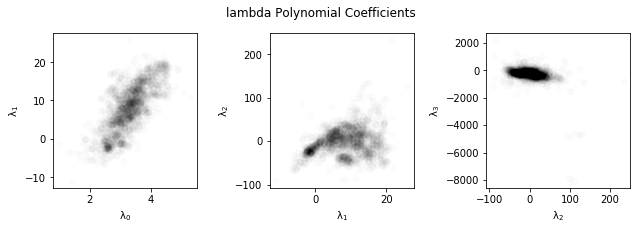

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax_labels = [chr(955) + "$_{}$".format(str(d)) for d in range(4)]
columns = [chr(955) + str(d) for d in range(4)]

for ix, a in enumerate(ax):
    a.scatter(lambdas[columns[ix]], lambdas[columns[ix + 1]], alpha=0.01, c="k")
    a.set_xlabel(ax_labels[ix])
    a.set_ylabel(ax_labels[ix + 1])

plt.tight_layout()
fig.suptitle("lambda Polynomial Coefficients", y=1.05);